<a href="https://colab.research.google.com/github/qb4745/evaluacion_1_deep_learning/blob/main/evaluacion_1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===============================
# MLP para Fashion MNIST
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Parámetros globales
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote para entrenamiento
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de carga de datos...
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: ...y los preprocesa para su uso en redes neuronales.
# Normalización: Escalar imágenes al rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Reformateo: Añadir dimensión de canal (necesario para Keras aunque sea 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# IL 1.2: (Relacionado) Preparación de etiquetas para función de error/salida 'categorical_crossentropy'/'softmax'
# One-hot encoding de etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1: ...considerando los conceptos de Deep Learning, tales como Perceptrón, Perceptrón multicapa y Red Neuronal Artificial.
# IL 1.3: Programa algoritmos en lenguaje Python, utilizando Tensorflow mediante Keras... para optimizar un modelo... (MLP).
print("\nDefiniendo la arquitectura del modelo MLP...")
model = keras.Sequential(name="mlp_fashion_mnist")
# Capa de aplanamiento para convertir la imagen 2D en vector 1D para el MLP
model.add(layers.Flatten(input_shape=input_shape))

# IL 1.2: Programa funciones de activación... aplicada a redes neuronales...
# Capa oculta 1 con activación ReLU
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))

# IL 1.3: ...aplicando técnicas de optimización y regularización, como dropout...
# Capa Dropout para regularización
model.add(layers.Dropout(0.5, name="dropout_1"))

# Capa oculta 2 con activación ReLU
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(0.5, name="dropout_2")) # Más Dropout

# IL 1.2: Programa funciones de... salida... aplicada a redes neuronales...
# Capa de salida con activación Softmax para clasificación multiclase
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

# Mostrar resumen de la arquitectura creada
model.summary()

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: ...para optimizar un modelo... (Selección de optimizador y tasa de aprendizaje)
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Programa funciones de... error... aplicada a redes neuronales...
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy... (Se especifica aquí)
model.compile(
    loss="categorical_crossentropy", # Función de error/pérdida
    optimizer=optimizer,             # Algoritmo de optimización
    metrics=["accuracy"]             # Métrica(s) a monitorizar
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de... entrenamiento de la red neuronal...
# Configura parámetros clave como épocas y tamaño de batch (definidos en Sección 1).
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa parte del training set para validación durante el entrenamiento
    verbose=2 # Muestra una línea por época
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy...
print("\nEvaluando en conjunto de prueba:")
score = model.evaluate(x_test, y_test, verbose=0) # Evalúa en datos no vistos
print(f"Test loss: {score[0]:.4f}")
# Esta es la métrica 'accuracy' calculada en el conjunto de prueba
print(f"Test accuracy: {score[1]:.4f}")

# ===============================
# Fin del Script Principal
# ===============================

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "mlp_fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 10s - 25ms/step - accuracy: 0.6654 - loss: 0.9475 - val_accuracy: 0.8223 - val_loss: 0.4950
Epoch 2/15
422/422 - 2s - 5ms/step - accuracy: 0.7916 - loss: 0.5982 - val_accuracy: 0.8378 - val_loss: 0.4430
Epoch 3/15
422/422 - 2s - 5ms/step - accuracy: 0.8171 - loss: 0.5304 - val_accuracy: 0.8470 - val_loss: 0.4111
Epoch 4/15
422/422 - 2s - 5ms/step - accuracy: 0.8264 - loss: 0.4996 - val_accuracy: 0.8475 - val_loss: 0.3954
Epoch 5/15
422/422 - 6s - 15ms/step - accuracy: 0.8328 - loss: 0.4804 - val_accuracy: 0.8603 - val_loss: 0.3780
Epoch 6/15
422/422 - 6s - 14ms/step - accuracy: 0.8380 - loss: 0.4674 - val_accuracy: 0.8617 - val_loss: 0.3802
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.8411 - loss: 0.4547 - val_accuracy: 0.8638 - val_loss: 0.3697
Epoch 8/15
422/422 - 3s - 7ms/step - accuracy: 0.8438 - loss: 0.4448 - val_accuracy: 0.8590 - val_los

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP (Baseline)...


Model: "mlp_fashion_mnist_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 5s - 11ms/step - accuracy: 0.6657 - loss: 0.9486 - val_accuracy: 0.8238 - val_loss: 0.4971
Epoch 2/15
422/422 - 4s - 9ms/step - accuracy: 0.7871 - loss: 0.6069 - val_accuracy: 0.8385 - val_loss: 0.4369
Epoch 3/15
422/422 - 2s - 5ms/step - accuracy: 0.8117 - loss: 0.5417 - val_accuracy: 0.8513 - val_loss: 0.4101
Epoch 4/15
422/422 - 2s - 5ms/step - accuracy: 0.8234 - loss: 0.5064 - val_accuracy: 0.8547 - val_loss: 0.3916
Epoch 5/15
422/422 - 3s - 8ms/step - accuracy: 0.8292 - loss: 0.4885 - val_accuracy: 0.8610 - val_loss: 0.3815
Epoch 6/15
422/422 - 4s - 11ms/step - accuracy: 0.8358 - loss: 0.4702 - val_accuracy: 0.8613 - val_loss: 0.3742
Epoch 7/15
422/422 - 3s - 6ms/step - accuracy: 0.8389 - loss: 0.4576 - val_accuracy: 0.8615 - val_loss: 0.3654
Epoch 8/15
422/422 - 3s - 6ms/step - accuracy: 0.8441 - loss: 0.4497 - val_accuracy: 0.8657 - val_loss:

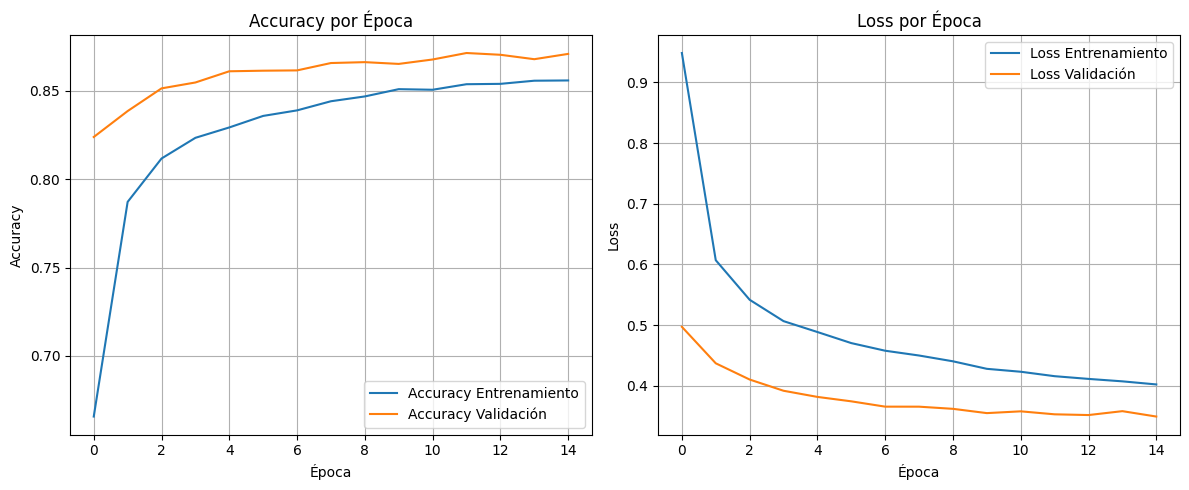


--- Fin del Script ---


In [2]:
# ===============================
# MLP para Fashion MNIST - Versión Mejorada para Cumplir ILs
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt # Añadido para visualización
from sklearn.metrics import classification_report # Añadido para métricas IL 1.4

# Parámetros globales (Estos son HIPERPARÁMETROS CLAVE para experimentar - IL 1.1, IL 1.3)
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam
dropout_rate = 0.5       # Tasa de Dropout (¡experimentar con este valor!)

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Carga de datos
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: Preprocesamiento
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# Guardar copias de las etiquetas de prueba para evaluación posterior (IL 1.4)
y_test_labels = y_test.copy() # Guardar etiquetas originales (números 0-9)

# IL 1.2: Preparación de etiquetas para 'categorical_crossentropy'/'softmax'
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1, IL 1.3: Implementación de un MLP usando Keras
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.2):**
#    - Para probar otras funciones de activación, cambia 'relu' por 'sigmoid', 'tanh', etc.
#    - Para probar diferentes arquitecturas, cambia el número de capas o neuronas (ej: 128 -> 256).
#    - Entrena un modelo por cada cambio y compara resultados.
print("\nDefiniendo la arquitectura del modelo MLP (Baseline)...")
model = keras.Sequential(name="mlp_fashion_mnist_baseline")
model.add(layers.Flatten(input_shape=input_shape))
# IL 1.2: Uso de función de activación 'relu'
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))
# IL 1.3: Uso de técnica de regularización 'Dropout'
model.add(layers.Dropout(dropout_rate, name="dropout_1")) # ¡Experimenta con dropout_rate!
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(dropout_rate, name="dropout_2"))
# IL 1.2: Uso de función de activación/salida 'softmax'
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

model.summary() # Útil para verificar la estructura y número de parámetros

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: Selección de optimizador Adam
# **ACCIÓN REQUERIDA (Experimentación IL 1.3):**
#    - Prueba otros optimizadores (ej: keras.optimizers.SGD(learning_rate=...)).
#    - Ajusta el 'learning_rate'.
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Selección de función de error 'categorical_crossentropy'
# **ACCIÓN REQUERIDA (Experimentación IL 1.2):**
#    - Si usas etiquetas numéricas (no one-hot), podrías usar 'sparse_categorical_crossentropy'.
#    - Compara el impacto si cambias la función de error (aunque categorical_crossentropy es estándar aquí).
# IL 1.4: Especificación de métrica 'accuracy' (se añadirán otras en evaluación)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"] # Accuracy se calcula durante el entrenamiento/evaluación
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecución del entrenamiento
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.3):**
#    - Ejecuta este bloque con diferentes 'batch_size' y 'epochs'.
#    - Compara las curvas de aprendizaje (generadas más abajo) para cada experimento.
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa 10% para validación
    verbose=2
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación Detallada en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa desempeño con accuracy, precision, recall, F1-Score
print("\nEvaluando en conjunto de prueba:")
# Paso 1: Obtener Loss y Accuracy base con evaluate()
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss (Pérdida): {score[0]:.4f}")
print(f"Test accuracy (Exactitud): {score[1]:.4f}")

# Paso 2: Obtener predicciones para calcular otras métricas
y_pred_prob = model.predict(x_test) # Obtiene probabilidades de salida
y_pred_classes = np.argmax(y_pred_prob, axis=1) # Convierte probabilidades a clase predicha (0-9)

# Paso 3: Calcular Precision, Recall, F1-Score usando classification_report
# Necesitamos las etiquetas de prueba originales (0-9), no las one-hot
print("\nReporte de Clasificación (Precision, Recall, F1-Score por clase y promedios):")
# y_test_labels fue guardada antes del one-hot encoding
print(classification_report(y_test_labels, y_pred_classes, digits=4))

# **ACCIÓN REQUERIDA (IL 1.4):**
#    - Crear un cuadro resumen en tu informe/notebook con Accuracy, Precision (promedio), Recall (promedio), F1-Score (promedio).
#    - Interpretar estas métricas: ¿Qué clases clasifica bien/mal? ¿Hay desbalance?
#    - Comparar estas métricas entre los diferentes modelos que entrenaste en tus experimentos.

# -------------------------------
# Sección 7: Visualización de Curvas de Aprendizaje (Análisis IL 1.1, IL 1.3)
# -------------------------------
# Útil para analizar el entrenamiento, detectar overfitting/underfitting y comparar experimentos
print("\nGenerando gráficos de curvas de aprendizaje...")
plt.figure(figsize=(12, 5))

# Gráfico de Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Accuracy por Época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfico de Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validación')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() # Muestra los gráficos

# **ACCIÓN REQUERIDA (Análisis y Comparación IL 1.1, IL 1.3):**
#    - Analiza estas curvas: ¿Hay sobreajuste (gap grande entre train/val)? ¿El modelo converge?
#    - Guarda estos gráficos para cada experimento que realices (ej., con diferente tasa de dropout, diferente # de épocas, etc.).
#    - Presenta gráficos comparativos en tu informe/notebook para justificar cómo las técnicas de optimización (dropout) o los cambios de hiperparámetros afectaron el entrenamiento.

# ===============================
# Sección 8: Conclusiones y Próximos Pasos (Documentación)
# ===============================
# **ACCIÓN REQUERIDA:**
#    - En tu cuaderno Jupyter, añade una sección final de Markdown para:
#        - Resumir los resultados del MEJOR modelo encontrado tras la experimentación.
#        - Discutir los hallazgos clave (qué funcionó, qué no, impacto de parámetros).
#        - Comparar explícitamente diferentes configuraciones (tabla resumen es ideal).
#        - Justificar las decisiones finales de arquitectura e hiperparámetros.
#        - Reflexionar sobre posibles mejoras futuras.
#
# ¡Recuerda documentar CADA experimento que realices en tu cuaderno!
# ===============================

print("\n--- Fin del Script ---")

---

## 1. Introducción

Este proyecto aborda un problema práctico de clasificación de imágenes utilizando una Red Neuronal Artificial (RNA) de tipo Perceptrón Multicapa (MLP). El objetivo es aplicar los fundamentos de Deep Learning para entrenar un modelo capaz de identificar diferentes tipos de artículos de moda a partir de imágenes en escala de grises.

Para este propósito, utilizaremos el dataset **Fashion-MNIST**. Este conjunto de datos fue desarrollado por Zalando Research y se presenta como un reemplazo directo ("drop-in replacement") del clásico dataset MNIST de dígitos escritos a mano. Mientras que MNIST es un estándar ampliamente utilizado para la validación inicial de algoritmos de Machine Learning, Fashion-MNIST ofrece un desafío potencialmente mayor manteniendo la misma estructura y formato: un conjunto de entrenamiento de 60,000 imágenes y un conjunto de prueba de 10,000 imágenes, todas ellas en escala de grises y de tamaño 28x28 píxeles, distribuidas en 10 clases distintas.

La elección de Fashion-MNIST nos permite trabajar con un dataset estandarizado, bien conocido en la comunidad, pero que requiere que el modelo aprenda características más complejas que las presentes en los dígitos manuscritos. El objetivo final de este encargo es implementar, entrenar, optimizar y evaluar un MLP utilizando TensorFlow/Keras para clasificar correctamente las imágenes de artículos de moda de este dataset, cumpliendo con los indicadores de logro especificados en la evaluación.

*Fuente oficial del dataset: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)*

## 2. Descripción del Dataset (Contenido)

El dataset Fashion-MNIST se compone de imágenes y sus correspondientes etiquetas de clase. A continuación, se detallan sus características principales:

*   **Dimensiones de la Imagen:** Cada imagen tiene una altura de 28 píxeles y un ancho de 28 píxeles, resultando en un total de 784 píxeles por imagen.
*   **Formato de Píxeles:** Las imágenes están en escala de grises. Cada píxel tiene asociado un único valor numérico entero que indica su nivel de oscuridad. Este valor varía entre 0 (blanco) y 255 (negro). Valores más altos representan píxeles más oscuros.
*   **Estructura de los Datos:** Cada Fila del Dataset representa una imagen:
    *   **Primera Columna:** Corresponde a la etiqueta de clase (un número del 0 al 9) que identifica el tipo de artículo de moda representado en la imagen.
    *   **Columnas Restantes (784):** Contienen los valores de los píxeles (0-255) de la imagen asociada, generalmente desplegados en un formato aplanado (vector de 784 elementos).
*   **Etiquetas de Clase:** Cada ejemplo (imagen) está asignado a una de las siguientes 10 clases, representadas por un número entero:

    *   `0`: T-shirt/top (Camiseta/Top)
    *   `1`: Trouser (Pantalón)
    *   `2`: Pullover (Suéter)
    *   `3`: Dress (Vestido)
    *   `4`: Coat (Abrigo)
    *   `5`: Sandal (Sandalia)
    *   `6`: Shirt (Camisa)
    *   `7`: Sneaker (Zapatilla deportiva)
    *   `8`: Bag (Bolso)
    *   `9`: Ankle boot (Botín)

**En resumen:** Cada fila del dataset representa una imagen de 28x28 píxeles en escala de grises, junto con una etiqueta numérica que indica a cuál de las 10 categorías de ropa pertenece. El objetivo del modelo será aprender a predecir esta etiqueta basándose en los 784 valores de píxeles de entrada.

---



---

## 3. Configuración del Entorno y Selección del Framework

Antes de proceder con la carga y preprocesamiento de los datos, es fundamental definir el entorno de trabajo y las herramientas principales que se utilizarán para la implementación de la Red Neuronal Artificial (MLP).

### 3.1. Elección del Framework: TensorFlow con Keras

Para el desarrollo de este proyecto, hemos seleccionado **TensorFlow (versión X.Y.Z)** como la biblioteca principal de Deep Learning, utilizando específicamente su interfaz de alto nivel **Keras**.

**Justificación de la Decisión:**

La elección de TensorFlow con Keras se basa en las siguientes consideraciones clave, alineadas con los objetivos de la evaluación y los requisitos del proyecto:

1.  **Facilidad de Uso y Desarrollo Rápido (API de Keras):** Keras proporciona una API intuitiva y modular que simplifica significativamente el proceso de definición, entrenamiento y evaluación de redes neuronales, incluyendo los MLP requeridos. Esto nos permite centrarnos en la aplicación de los conceptos fundamentales de Deep Learning (como la arquitectura del modelo, funciones de activación, optimizadores y métricas) en lugar de en detalles de implementación de bajo nivel.
2.  **Cumplimiento de Requisitos:** TensorFlow/Keras ofrece todas las componentes necesarias para abordar los Indicadores de Logro de esta evaluación:
    *   Capas densas para construir el MLP.
    *   Amplia variedad de funciones de activación  y la flexibilidad para definir funciones personalizadas si fuera necesario .
    *   Diversas funciones de pérdida adecuadas para problemas de clasificación.
    *   Múltiples algoritmos de optimización para entrenar y optimizar el modelo.
    *   Herramientas integradas para la evaluación del modelo y el cálculo de métricas.
3.  **Documentación Extensa y Comunidad Activa:** TensorFlow y Keras cuentan con una documentación oficial muy completa, numerosos tutoriales y una vasta comunidad de usuarios. Esto facilita la resolución de dudas y la consulta de ejemplos durante el desarrollo.
4.  **Integración con Ecosistema:** TensorFlow se integra fácilmente con otras herramientas útiles del ecosistema de Data Science en Python, como NumPy, Pandas y Scikit-learn (que utilizaremos para la carga y preprocesamiento de datos), así como con herramientas de visualización como Matplotlib/Seaborn y TensorBoard (para un análisis más profundo del entrenamiento, si se requiere).
5.  **Entorno de Ejecución (Google Colab):** TensorFlow está preinstalado y optimizado para su uso en Google Colab, el entorno recomendado para este proyecto, permitiendo aprovechar fácilmente los recursos de hardware como GPUs o TPUs para acelerar el entrenamiento si fuera necesario.

**En resumen**, la combinación TensorFlow/Keras representa un balance adecuado entre potencia, flexibilidad y facilidad de uso, lo que la convierte en una opción idónea para implementar eficientemente el MLP solicitado y cumplir con los objetivos de esta evaluación dentro del plazo establecido. Las siguientes secciones detallarán cómo se utiliza este framework para la carga, preprocesamiento, modelado y evaluación.

---

## **1. Importación de Librerías**
Iniciamos el proyecto importando las bibliotecas y módulos de Python esenciales para llevar a cabo las tareas de carga de datos, preprocesamiento, construcción del modelo, entrenamiento, evaluación y visualización.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

## **2. Carga de Datos Y División del DataSet**
En esta sección fundamental, procedemos a cargar el dataset Fashion MNIST, que utilizaremos para entrenar y evaluar nuestro modelo de clasificación MLP.

Empleamos la función integrada keras.datasets.fashion_mnist.load_data().
Esta función realiza dos tareas clave:

**Carga:** Obtiene el conjunto de datos completo, descargándolo automáticamente.
**División Estándar:** Divide el dataset cargado en los conjuntos predefinidos y estándar de entrenamiento (x_train, y_train) y prueba (x_test, y_test), tal como fueron definidos originalmente por los creadores del dataset (Zalando Research).

Disponer de esta división predefinida es esencial, ya que nos permite trabajar con la partición estándar utilizada en la comunidad de investigación y asegura una base comparable para la evaluación del modelo. Las variables x_train, y_train contendrán las 60,000 muestras de entrenamiento (imágenes y etiquetas), mientras que x_test, y_test contendrán las 10,000 muestras de prueba, listas para la siguiente fase de análisis exploratorio.

In [4]:
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado y dividido.")
print("-" * 40)





Cargando dataset Fashion MNIST...
Dataset cargado y dividido.
----------------------------------------


## **3. Exploratory Data Analysis (EDA)**

Antes de preprocesar los datos y construir el modelo, es crucial realizar un análisis exploratorio para comprender la estructura, distribución y características del dataset Fashion MNIST. En esta sección, cargaremos los datos, visualizaremos la cantidad de muestras, la distribución de las clases y algunas imágenes de ejemplo.

Resumen Numérico Rápido:
  x_train shape: (60000, 28, 28), y_train shape: (60000,)
  x_test shape: (10000, 28, 28), y_test shape: (10000,)
----------------------------------------


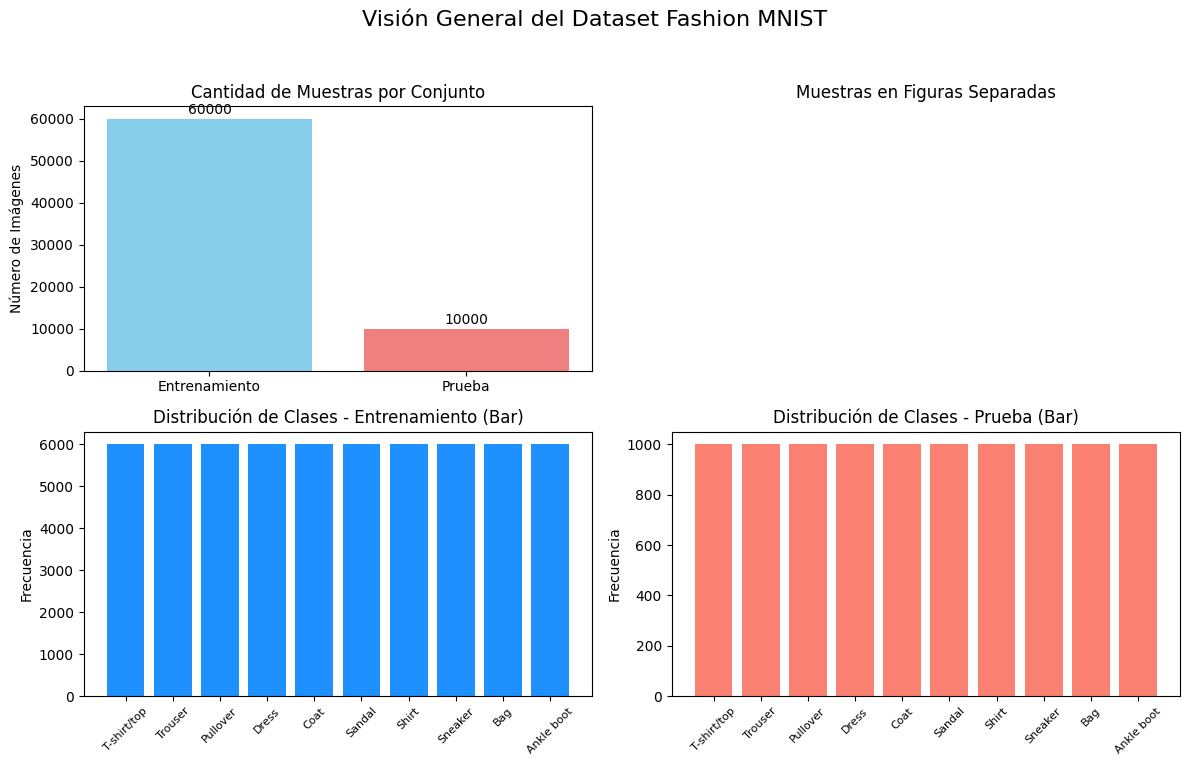


Mostrando algunas imágenes de ENTRENAMIENTO:


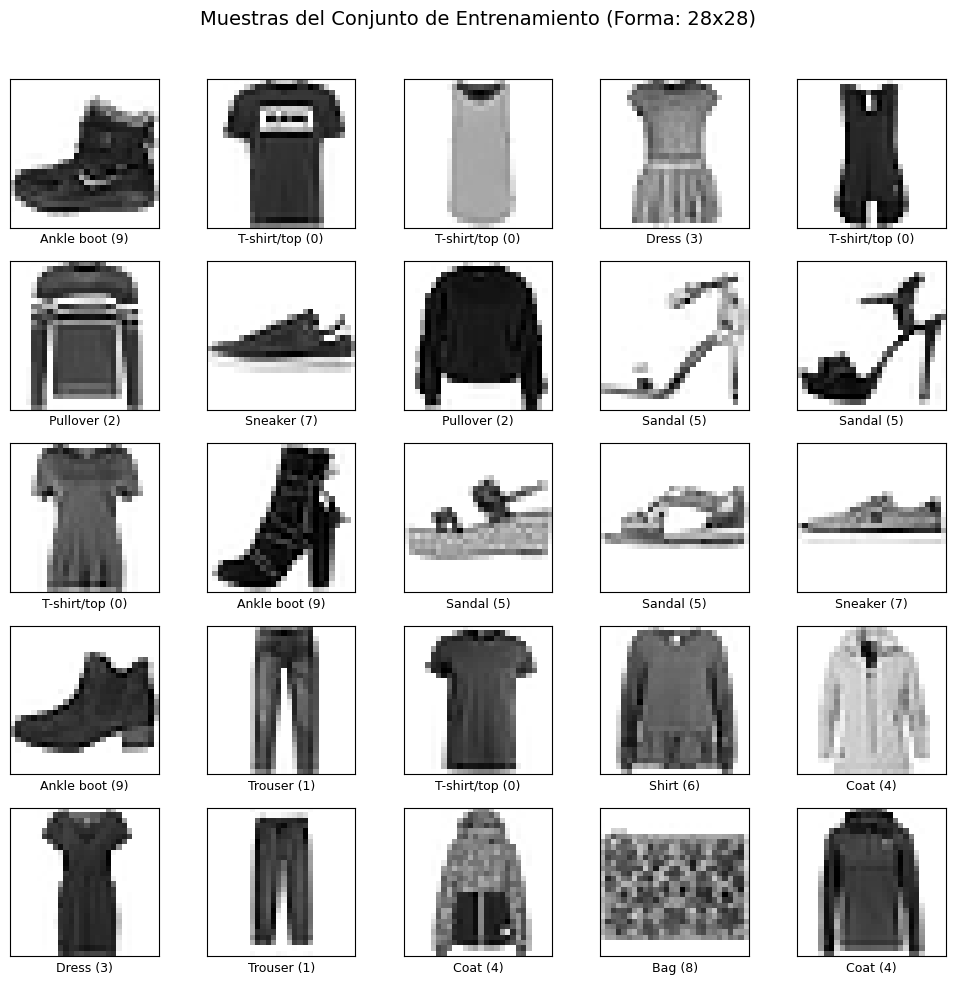


Mostrando algunas imágenes de PRUEBA:


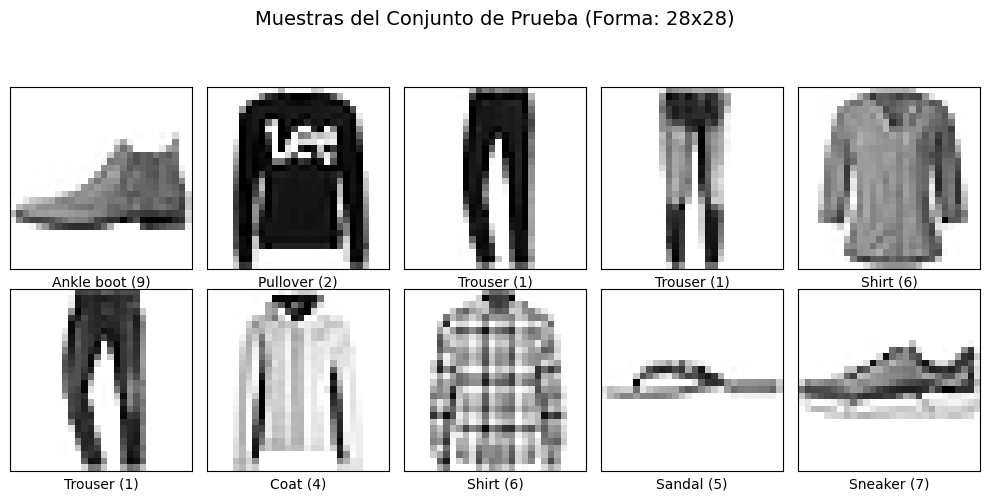

----------------------------------------
Visualizaciones Adicionales para las ETIQUETAS (y_train, y_test):
----------------------------------------

Mostrando la secuencia de las primeras 100 etiquetas de entrenamiento (y_train):


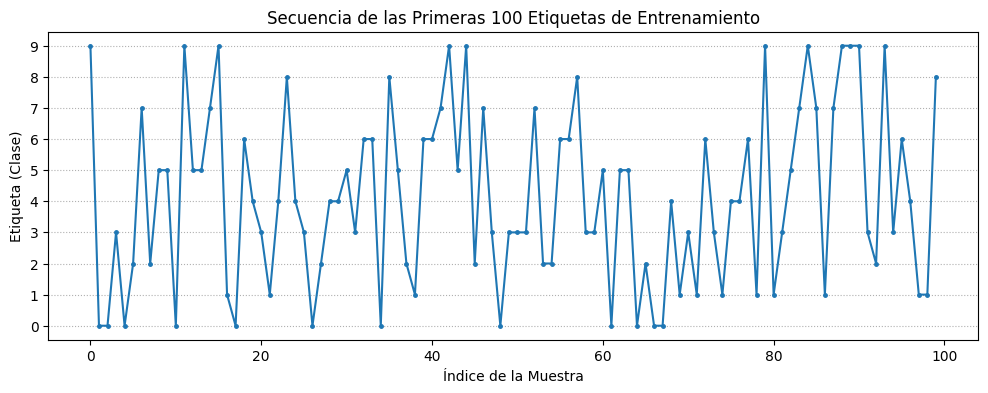

-> Observación: Este gráfico muestra el valor de la etiqueta para cada muestra consecutiva.
   Normalmente no revela patrones obvios, ya que el orden suele ser aleatorio.
Mostrando la Imagen en el Índice: 0
Etiqueta correspondiente: 9 (Ankle boot)
----------------------------------------
Representación como Array NumPy (Valores de Píxeles):
Forma del array de la imagen: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0

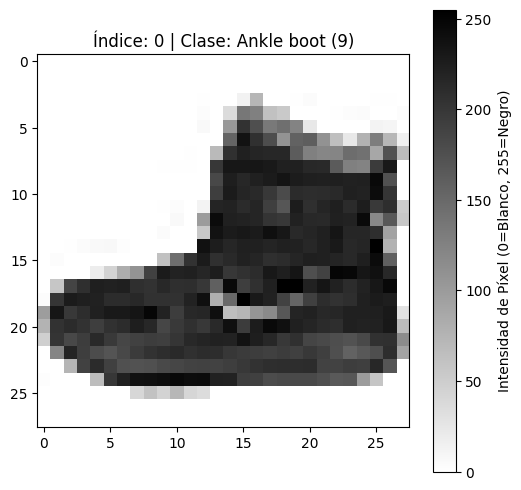


Generando histograma de intensidad de píxeles...


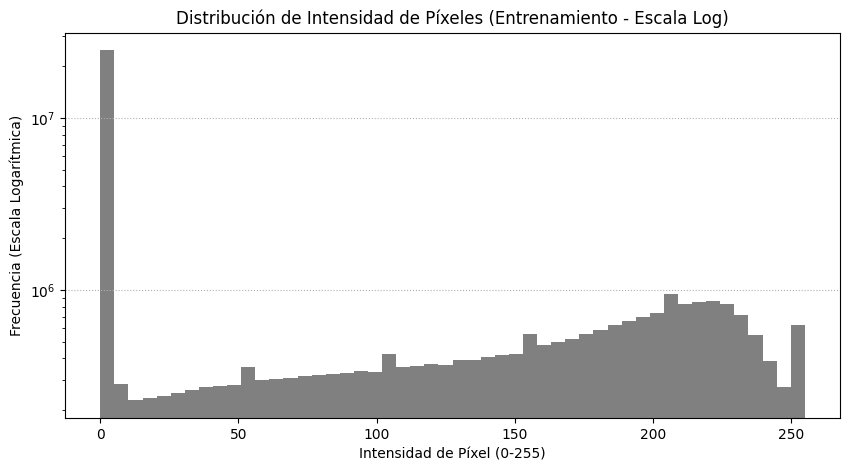

-> El histograma muestra la frecuencia de cada nivel de intensidad de píxel (0-255) en todo el conjunto de entrenamiento.
-> La escala logarítmica en el eje Y ayuda a visualizar la distribución incluso para intensidades menos frecuentes.


In [5]:
# --- Información Numérica (como referencia) ---
print("Resumen Numérico Rápido:")
print(f"  x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"  x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print("-" * 40)


# --- Preparación para Gráficos ---

# Nombres de las clases para las etiquetas (del 0 al 9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cantidades para el gráfico de barras
train_samples = len(x_train)
test_samples = len(x_test)


# --- Creación de Gráficos PRINCIPALES (Cantidad y Distribución) ---

# Crear una figura para los gráficos de cantidad y distribución (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Visión General del Dataset Fashion MNIST', fontsize=16)

# --- Gráfico 1: Cantidad de Muestras ---
axes[0, 0].bar(['Entrenamiento', 'Prueba'], [train_samples, test_samples], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Cantidad de Muestras por Conjunto')
axes[0, 0].set_ylabel('Número de Imágenes')
for i, count in enumerate([train_samples, test_samples]):
    axes[0, 0].text(i, count + 500, str(count), ha='center', va='bottom')

# --- Gráfico 2: Placeholder / Vacío ---
axes[0, 1].set_title('Muestras en Figuras Separadas')
axes[0, 1].axis('off')

# --- Gráfico 3: Distribución de Clases (Entrenamiento) - Bar Chart ---
train_labels, train_counts = np.unique(y_train, return_counts=True)
axes[1, 0].bar(class_names, train_counts, color='dodgerblue')
axes[1, 0].set_title('Distribución de Clases - Entrenamiento (Bar)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)

# --- Gráfico 4: Distribución de Clases (Prueba) - Bar Chart ---
test_labels, test_counts = np.unique(y_test, return_counts=True)
axes[1, 1].bar(class_names, test_counts, color='salmon')
axes[1, 1].set_title('Distribución de Clases - Prueba (Bar)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Creación de Figura SEPARADA para Muestras de Entrenamiento ---
print("\nMostrando algunas imágenes de ENTRENAMIENTO:")
plt.figure(figsize=(10,10))
plt.suptitle(f"Muestras del Conjunto de Entrenamiento (Forma: {x_train.shape[1]}x{x_train.shape[2]})", fontsize=14)
num_rows, num_cols = 5, 5
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[y_train[i]]} ({y_train[i]})", fontsize=9)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- Creación de Figura SEPARADA para Muestras de Prueba ---
print("\nMostrando algunas imágenes de PRUEBA:")
plt.figure(figsize=(10,5))
plt.suptitle(f"Muestras del Conjunto de Prueba (Forma: {x_test.shape[1]}x{x_test.shape[2]})", fontsize=14)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[y_test[i]]} ({y_test[i]})")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# --- NUEVO: Gráficos Adicionales para y_train / y_test ---

print("-" * 40)
print("Visualizaciones Adicionales para las ETIQUETAS (y_train, y_test):")
print("-" * 40)

# --- Gráfico Adicional 1: Line Plot de las primeras N etiquetas de Entrenamiento ---
print("\nMostrando la secuencia de las primeras 100 etiquetas de entrenamiento (y_train):")
num_labels_to_plot = 100
plt.figure(figsize=(12, 4))
plt.plot(np.arange(num_labels_to_plot), y_train[:num_labels_to_plot], marker='.', linestyle='-', markersize=5)
plt.title(f'Secuencia de las Primeras {num_labels_to_plot} Etiquetas de Entrenamiento')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Etiqueta (Clase)')
plt.yticks(np.arange(10)) # Asegura que los ticks sean los números de clase 0-9
plt.grid(True, axis='y', linestyle=':')
plt.show()
print("-> Observación: Este gráfico muestra el valor de la etiqueta para cada muestra consecutiva.")
print("   Normalmente no revela patrones obvios, ya que el orden suele ser aleatorio.")




# Nombres de las clases para referencia
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- Seleccionar una imagen específica ---
indice_imagen = 0 # Vamos a mostrar la primera imagen (puedes cambiar este número)
imagen_seleccionada = x_train[indice_imagen]
etiqueta_seleccionada = y_train[indice_imagen]
nombre_clase = class_names[etiqueta_seleccionada]

# --- 1. Mostrar la imagen como Array NumPy ---
print(f"Mostrando la Imagen en el Índice: {indice_imagen}")
print(f"Etiqueta correspondiente: {etiqueta_seleccionada} ({nombre_clase})")
print("-" * 40)
print("Representación como Array NumPy (Valores de Píxeles):")
print(f"Forma del array de la imagen: {imagen_seleccionada.shape}")
# Para que no ocupe toda la pantalla, podemos configurar NumPy para imprimir menos
# np.set_printoptions(threshold=50) # Descomenta si quieres limitar la salida
print(imagen_seleccionada)
print("-" * 40)


# --- 2. Mostrar la imagen con un Gráfico (Matplotlib) ---
print("Representación Gráfica de la Imagen:")

plt.figure(figsize=(6, 6)) # Crear una figura (ajusta tamaño si es necesario)

# Mostrar la imagen
# cmap=plt.cm.binary la muestra en blanco y negro (escala de grises invertida)
# cmap='gray' también es común para escala de grises estándar
plt.imshow(imagen_seleccionada, cmap=plt.cm.binary)

# Añadir un título descriptivo
plt.title(f"Índice: {indice_imagen} | Clase: {nombre_clase} ({etiqueta_seleccionada})")

# Añadir una barra de color para entender la escala de píxeles
plt.colorbar(label='Intensidad de Píxel (0=Blanco, 255=Negro)')

# Opcional: Ocultar los ejes numerados (ya que la forma 28x28 es más relevante)
# plt.xticks([])
# plt.yticks([])
plt.grid(False) # Quitar la cuadrícula que a veces aparece por defecto

# Mostrar el gráfico
plt.show()


# --- Histograma de Intensidad de Píxeles (Entrenamiento) ---

print("\nGenerando histograma de intensidad de píxeles...")

# Crear una nueva figura para el histograma con un tamaño específico
plt.figure(figsize=(10, 5)) # Ancho 10, Alto 5 pulgadas

# Calcular y dibujar el histograma:
# 1. x_train.flatten():
#    - `x_train` tiene la forma (60000, 28, 28) o (60000, 28, 28, 1) si ya añadiste el canal.
#    - `.flatten()` convierte este array multidimensional en un ÚNICO array largo (1D)
#      que contiene TODOS los valores de los píxeles de TODAS las 60,000 imágenes de entrenamiento,
#      uno después del otro. (Total: 60000 * 28 * 28 = 47,040,000 valores).
#    - Esto es necesario porque `plt.hist` opera sobre una secuencia de valores individuales.
#
# 2. bins=50:
#    - Divide el rango completo de valores posibles (0 a 255) en 50 intervalos o "contenedores" (bins) de igual tamaño.
#    - `plt.hist` contará cuántos valores de píxeles caen dentro de cada uno de estos 50 intervalos.
#    - Elegir el número de bins afecta la granularidad del histograma.
#
# 3. color='gray':
#    - Simplemente establece el color de las barras del histograma a gris, lo cual es temáticamente apropiado
#      para datos de imágenes en escala de grises.
#
# 4. log=True:
#    - Aplica una escala LOGARÍTMICA al eje Y (Frecuencia).
#    - **¡Esto es muy importante!** En muchas imágenes, los valores de píxeles extremos (como 0 para el fondo blanco)
#      son MUCHÍSIMO más frecuentes que los valores intermedios de gris.
#    - Sin una escala logarítmica, el pico en 0 sería tan alto que las barras para los otros valores
#      serían casi invisibles, haciendo difícil ver su distribución.
#    - La escala logarítmica comprime las frecuencias altas y expande las bajas, permitiendo
#      visualizar mejor la distribución completa, incluyendo los valores menos frecuentes.
plt.hist(x_train.flatten(), bins=50, color='gray', log=True)

# Añadir título y etiquetas a los ejes para claridad
plt.title('Distribución de Intensidad de Píxeles (Entrenamiento - Escala Log)')
plt.xlabel('Intensidad de Píxel (0-255)')
plt.ylabel('Frecuencia (Escala Logarítmica)') # Indicar explícitamente la escala log

# Añadir una cuadrícula horizontal punteada para facilitar la lectura en la escala log
plt.grid(True, axis='y', linestyle=':')

# Mostrar el gráfico generado
plt.show()

print("-> El histograma muestra la frecuencia de cada nivel de intensidad de píxel (0-255) en todo el conjunto de entrenamiento.")
print("-> La escala logarítmica en el eje Y ayuda a visualizar la distribución incluso para intensidades menos frecuentes.")

## **4. Preprocesamiento de Datos para el Modelo**

Tras la exploración inicial en la sección de EDA, procedemos ahora a preparar los datos de Fashion MNIST para que sean adecuados como entrada a nuestro modelo MLP. Este preprocesamiento es esencial para asegurar un entrenamiento eficiente y mejorar el rendimiento potencial del modelo.

Los pasos clave que realizaremos en esta sección son:

1.  **Normalización de Imágenes:** Los valores de los píxeles de las imágenes originales se encuentran en el rango [0, 255]. Escalaremos estos valores al rango [0, 1] dividiendo cada píxel por 255.0. Esta normalización ayuda a estabilizar el proceso de entrenamiento y a que el modelo converja más rápidamente, evitando que valores de píxeles muy altos dominen los cálculos.
2.  **Reformateo de Imágenes:** Añadiremos una dimensión extra al final de la forma (`shape`) de los arrays de imágenes para representar el canal de color. Aunque las imágenes son en escala de grises (un solo canal), muchas capas de Keras esperan explícitamente esta dimensión (formato `[altura, ancho, canales]`), por lo que transformaremos la forma de `(28, 28)` a `(28, 28, 1)`.
3.  **Codificación One-Hot de Etiquetas:** Las etiquetas de clase originales son números enteros del 0 al 9. Para utilizar la función de pérdida `categorical_crossentropy` (adecuada para clasificación multiclase) y la activación `softmax` en la capa de salida, necesitamos convertir estas etiquetas a un formato binario "one-hot". Cada etiqueta se transformará en un vector de 10 elementos con un '1' en la posición correspondiente a su clase y '0's en el resto.

A continuación, implementaremos estos pasos y visualizaremos su efecto en una muestra de los datos para verificar y comprender las transformaciones realizadas.



--- Iniciando Preprocesamiento ---
Muestras originales (imagen y etiqueta) guardadas para visualización.

1. Normalizando imágenes (Escalando a [0, 1])...
   Imágenes normalizadas.

2. Reformateando imágenes (añadiendo dimensión de canal)...
   Dimensión de canal añadida.
   Nueva forma datos entrenamiento (x_train): (60000, 28, 28, 1)

3. Codificando etiquetas (One-Hot Encoding)...
   Etiquetas convertidas a formato one-hot.
   Nueva forma etiquetas entrenamiento (y_train): (60000, 10)
----------------------------------------
Preprocesamiento completado.
----------------------------------------

--- Visualizando Efecto del Preprocesamiento en la Muestra 0 ---


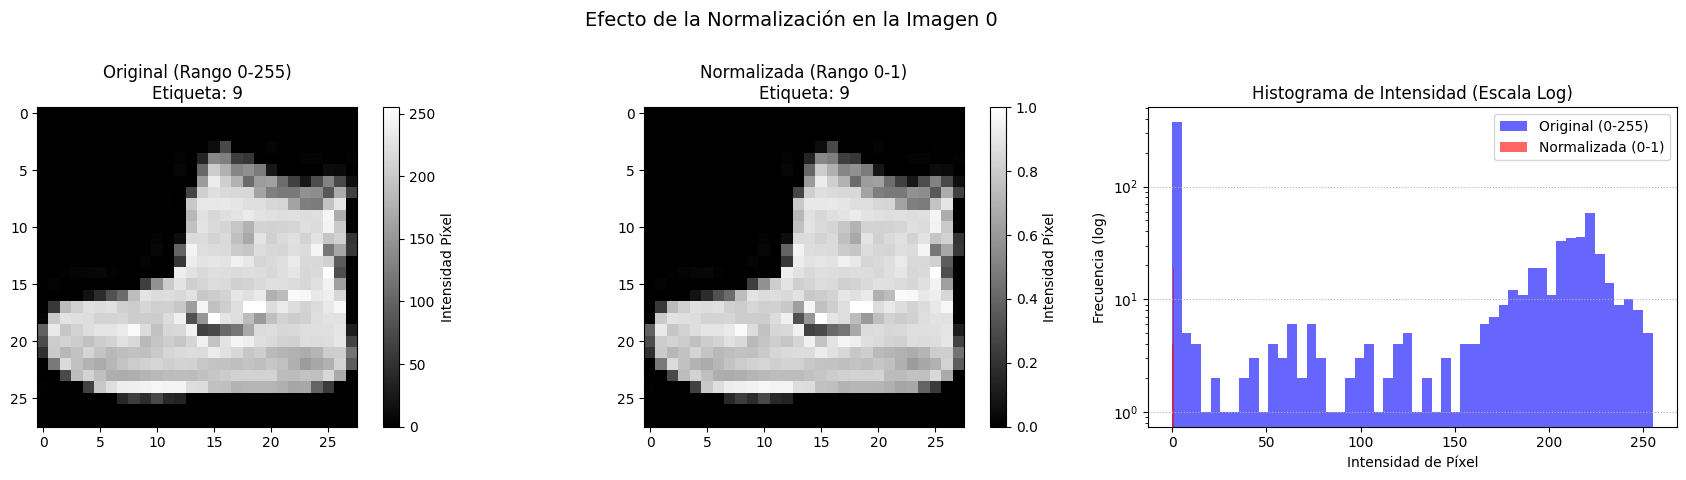

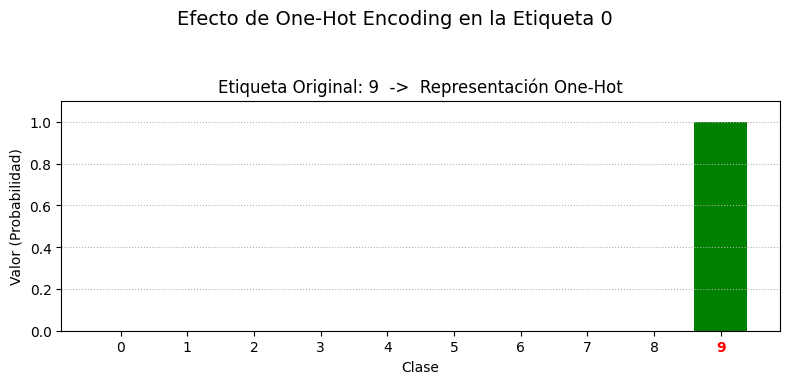

----------------------------------------


In [6]:
# ---------------------------------------------------------------------------
## 4. Preprocesamiento de Datos para el Modelo
# ---------------------------------------------------------------------------
# Después de explorar los datos, preparamos la data para la red neuronal.
# Estos pasos son cruciales para un entrenamiento eficiente y efectivo.
print("\n--- Iniciando Preprocesamiento ---")

# --- Variables Globales Necesarias ---
# Asegúrate de que num_classes esté definido desde una celda anterior o defínelo aquí
if 'num_classes' not in locals():
    num_classes = 10 # Definir si no existe
    print(f"Variable 'num_classes' definida como {num_classes}.")

# --- Guardar muestras originales para visualización ---
# Guardamos una copia de la primera imagen y etiqueta ANTES de modificarlas.
if 'x_train' in locals() and x_train.ndim == 3 and x_train.size > 0: # Verificar que x_train sea 3D (antes de añadir canal)
    original_image_sample = x_train[0].copy() # Copia de la primera imagen (28x28 array)
    original_label_sample = y_train[0].copy() # Copia de la primera etiqueta (int)
    print("Muestras originales (imagen y etiqueta) guardadas para visualización.")
    sample_available = True
else:
    print("Advertencia: x_train/y_train no están en el formato esperado o vacíos. No se guardaron muestras originales.")
    original_image_sample = None
    original_label_sample = None
    sample_available = False

# --- Paso 1: Normalización de las Imágenes ---
print("\n1. Normalizando imágenes (Escalando a [0, 1])...")
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
print("   Imágenes normalizadas.")

# --- Paso 2: Reformateo de las Imágenes ---
print("\n2. Reformateando imágenes (añadiendo dimensión de canal)...")
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)
print("   Dimensión de canal añadida.")
print(f"   Nueva forma datos entrenamiento (x_train): {x_train.shape}")

# --- Paso 3: Codificación One-Hot de las Etiquetas ---
print("\n3. Codificando etiquetas (One-Hot Encoding)...")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("   Etiquetas convertidas a formato one-hot.")
print(f"   Nueva forma etiquetas entrenamiento (y_train): {y_train.shape}")

print("-" * 40)
print("Preprocesamiento completado.")
print("-" * 40)

# --- Visualización del Efecto del Preprocesamiento (Usando la Muestra Guardada) ---

if sample_available:
    print("\n--- Visualizando Efecto del Preprocesamiento en la Muestra 0 ---")

    # --- Visualización Paso 1: Normalización ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Efecto de la Normalización en la Imagen 0', fontsize=14)

    # Imagen Original
    im_orig = axes[0].imshow(original_image_sample, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title(f'Original (Rango 0-255)\nEtiqueta: {original_label_sample}')
    axes[0].grid(False)
    fig.colorbar(im_orig, ax=axes[0], label='Intensidad Píxel')

    # Imagen Normalizada (Tomamos la primera imagen de x_train ya procesado)
    # Usamos .squeeze() para quitar la dimensión del canal para imshow
    im_norm = axes[1].imshow(x_train[0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[1].set_title(f'Normalizada (Rango 0-1)\nEtiqueta: {original_label_sample}')
    axes[1].grid(False)
    fig.colorbar(im_norm, ax=axes[1], label='Intensidad Píxel')

    # Histograma Comparativo
    axes[2].hist(original_image_sample.flatten(), bins=50, color='blue', alpha=0.6, label='Original (0-255)', log=True)
    axes[2].hist(x_train[0].flatten(), bins=50, color='red', alpha=0.6, label='Normalizada (0-1)', log=True)
    axes[2].set_title('Histograma de Intensidad (Escala Log)')
    axes[2].set_xlabel('Intensidad de Píxel')
    axes[2].set_ylabel('Frecuencia (log)')
    axes[2].legend()
    axes[2].grid(True, axis='y', linestyle=':')

    plt.tight_layout(rect=[0, 0.03, 1, 0.93]) # Ajuste para suptitle
    plt.show()

    # --- Visualización Paso 3: One-Hot Encoding ---
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    fig.suptitle('Efecto de One-Hot Encoding en la Etiqueta 0', fontsize=14)

    # Obtener la etiqueta one-hot procesada para la muestra 0
    one_hot_label = y_train[0]
    classes = np.arange(num_classes) # Clases 0 a 9

    ax.bar(classes, one_hot_label, color='green')
    ax.set_title(f'Etiqueta Original: {original_label_sample}  ->  Representación One-Hot')
    ax.set_xlabel('Clase')
    ax.set_ylabel('Valor (Probabilidad)')
    ax.set_xticks(classes) # Asegurar que se muestren todas las clases 0-9
    ax.set_ylim(0, 1.1) # Límite eje Y hasta un poco más de 1
    ax.grid(True, axis='y', linestyle=':')

    # Marcar la clase correcta
    correct_class_index = np.argmax(one_hot_label)
    ax.get_xticklabels()[correct_class_index].set_color("red")
    ax.get_xticklabels()[correct_class_index].set_fontweight("bold")


    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

else:
    print("\nNo se generaron visualizaciones de preprocesamiento porque las muestras originales no estaban disponibles.  Reiniciar el Kernel y Correr todo denuevo")


print("-" * 40)
# ---------------------------------------------------------------------------
# Fin de la Sección de Preprocesamiento y Visualización
# ---------------------------------------------------------------------------

"""Gráfico 1: Efecto de la Normalización en la Imagen 0 (Figura con 3 subplots)
Subplot 1: Imagen Original (Rango 0-255)
¿Qué muestra? Simplemente la primera imagen del dataset tal como se cargó, en escala de grises. La barra de color a la derecha indica que los píxeles más oscuros tienen valores cercanos a 255 y los más claros a 0.
¿Qué significa? Nos da una referencia visual de cómo son los datos crudos antes de cualquier transformación numérica. Vemos la prenda de vestir (o el artículo) sobre un fondo predominantemente blanco.
¿Importancia? Sirve como punto de partida visual. Nos permite confirmar que la imagen se cargó correctamente y tener una idea del rango original de los valores de los píxeles (confirmado por la barra de color).
Subplot 2: Imagen Normalizada (Rango 0-1)
¿Qué muestra? La misma imagen que antes, pero después de aplicar la normalización (dividir por 255.0). Visualmente, se ve idéntica a la original porque imshow ajusta automáticamente el rango de colores para mostrarla. Sin embargo, la barra de color ahora indica que los valores van de 0.0 (blanco) a 1.0 (negro).
¿Qué significa? Demuestra que, aunque la apariencia visual no cambie drásticamente, los valores numéricos subyacentes que representan la imagen ahora están confinados al intervalo [0, 1].
¿Importancia? Aunque visualmente no sea impactante, es crucial para entender que la representación numérica que alimentará a la red neuronal ha cambiado. Este nuevo rango [0, 1] es preferible para los algoritmos de optimización (como Adam) porque evita problemas de escala y puede llevar a una convergencia más rápida y estable durante el entrenamiento.
Subplot 3: Histograma de Intensidad (Original vs. Normalizada)
¿Qué muestra? Compara la distribución de los valores de los píxeles de la primera imagen antes (azul) y después (rojo) de la normalización. El eje X representa la intensidad del píxel y el eje Y (en escala logarítmica) representa cuántos píxeles tienen esa intensidad.
¿Qué significa? Vemos que la forma de la distribución es la misma, pero el rango en el eje X cambia drásticamente. El histograma azul se extiende de 0 a 255, mientras que el rojo se comprime entre 0 y 1. El pico alto cerca de 0 (fondo blanco) es evidente en ambos. La escala logarítmica nos permite ver también las frecuencias de los tonos grises intermedios.
¿Importancia? Este gráfico cuantifica el efecto de la normalización. Confirma que la operación simplemente reescaló los valores sin alterar la distribución relativa de las intensidades. Es la prueba visual de que la transformación matemática (dividir por 255) se aplicó correctamente a todos los píxeles de esa imagen y cambió su rango.
Gráfico 2: Efecto de One-Hot Encoding en la Etiqueta 0 (Figura con 1 subplot)
¿Qué muestra? Un diagrama de barras con 10 barras, correspondientes a las 10 clases posibles (0 a 9). Solo una barra tiene altura 1, mientras que las demás tienen altura 0. El título indica cuál era la etiqueta numérica original y la barra roja/negrita en el eje X marca la clase correspondiente a la barra alta.
¿Qué significa? Muestra cómo la etiqueta numérica original (por ejemplo, si original_label_sample era 9) se transforma en un vector binario. Este vector representa una distribución de probabilidad donde estamos 100% seguros (valor 1) de que la imagen pertenece a esa clase específica (la clase 9 en el ejemplo) y 0% seguro de que pertenece a cualquier otra clase.
¿Importancia? Visualiza la transformación fundamental de la etiqueta para que sea compatible con la función de pérdida categorical_crossentropy y la capa de salida softmax de la red neuronal. La red neuronal aprenderá a producir un vector de salida similar (con probabilidades para cada clase), y la función de pérdida comparará ese vector predicho con este vector "verdadero" (one-hot) para calcular el error y ajustar los pesos. Entender este formato es clave para comprender cómo funciona la clasificación multiclase en este contexto.
"""